# 목표
- 10종류의 패션 이미지 데이터를 분류하는 신경망 모델을 만들어보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# keras에서 지원하는 패션 이미지 데이터 임포트
from tensorflow.keras.datasets import fashion_mnist

In [2]:
data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train_onehot = pd.get_dummies(y_train)
y_test_onehot = pd.get_dummies(y_test)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

### 활성화함수, 최적화함수 별 비교
1. 중간층 활성화함수 : sigmoid, 최적화함수 : SGD
2. 중간층 활성화함수 : relu, 최적화함수 : SGD
3. 중간층 활성화함수 : relu, 최적화함수 : Adam
- 각각의 신경망을 설계하고 결과를 비교해보세요~!

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

- sigmoid, SGD

In [8]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28,28))) # 입력층
model1.add(Dense(500, activation='sigmoid')) # 중간층들
model1.add(Dense(300, activation='sigmoid'))
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dense(30, activation='sigmoid'))
model1.add(Dense(10, activation='softmax')) # 출력층

model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])

- relu, SGD

In [9]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28,28))) # 입력층
model2.add(Dense(500, activation='relu')) # 중간층들
model2.add(Dense(300, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(10, activation='softmax')) # 출력층

model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])

- relu, Adam

In [10]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28,28))) # 입력층
model3.add(Dense(500, activation='relu')) # 중간층들
model3.add(Dense(300, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(30, activation='relu'))
model3.add(Dense(10, activation='softmax')) # 출력층

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [11]:
h1 = model1.fit(X_train, y_train_onehot, epochs=30,
              batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 7s 5ms/step - loss: 2.3140 - acc: 0.1396 - val_loss: 2.2852 - val_acc: 0.1659
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2769 - acc: 0.3245 - val_loss: 2.2680 - val_acc: 0.4246
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 2.2575 - acc: 0.4018 - val_loss: 2.2449 - val_acc: 0.4283
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 2.2287 - acc: 0.4146 - val_loss: 2.2087 - val_acc: 0.4330
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 2.1813 - acc: 0.3673 - val_loss: 2.1471 - val_acc: 0.3615
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 2.1010 - acc: 0.4076 - val_loss: 2.0458 - val_acc: 0.4110
Epoch 7/30
375/375 [==============================] - 2s 4ms/step - loss: 1.9822 - acc: 0.3991 - val_loss: 1.9130 - val_acc: 0.4214
Epoch 8/30
375/375 [==============================] - 1s 4ms/step - loss: 1.

In [14]:
h2 = model2.fit(X_train, y_train_onehot, epochs=30,
              batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: nan - acc: 0.0991 - val_loss: nan - val_acc: 0.1030
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 8/30
375/375 [==============================] - 1s 4ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc:

In [15]:
h3 = model3.fit(X_train, y_train_onehot, epochs=30,
              batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 4s 4ms/step - loss: 2.0493 - acc: 0.5780 - val_loss: 1.0050 - val_acc: 0.6535
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.9053 - acc: 0.6953 - val_loss: 0.7330 - val_acc: 0.7299
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.6442 - acc: 0.7326 - val_loss: 0.6181 - val_acc: 0.7450
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.5664 - acc: 0.7741 - val_loss: 0.5177 - val_acc: 0.8179
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4673 - acc: 0.8299 - val_loss: 0.4675 - val_acc: 0.8378
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3927 - acc: 0.8581 - val_loss: 0.4355 - val_acc: 0.8460
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.3707 - acc: 0.8644 - val_loss: 0.4248 - val_acc: 0.8508
Epoch 8/30
375/375 [==============================] - 1s 4ms/step - loss: 0.

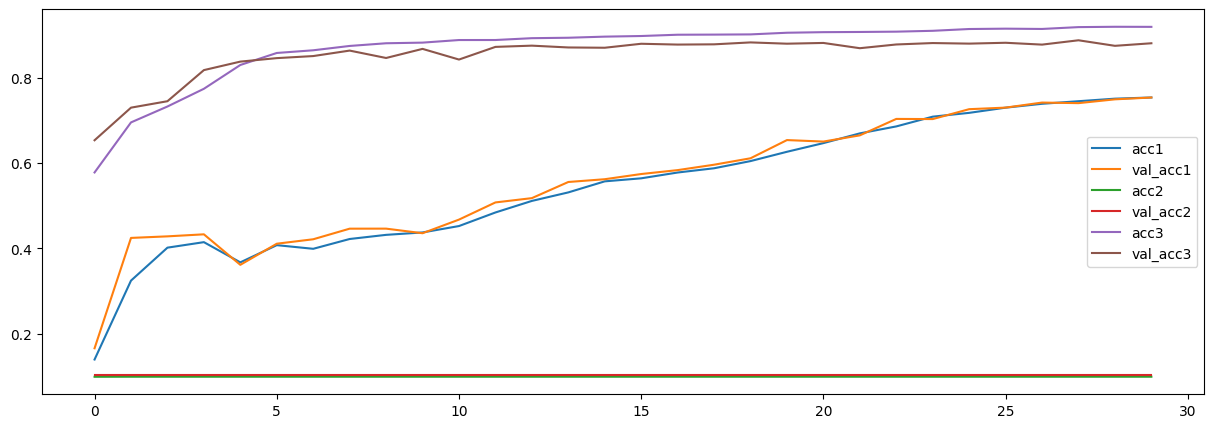

In [19]:
plt.figure(figsize=(15,5))

# sigmoid, SGD 사용한 모델
plt.plot(h1.history['acc'], label='acc1')
plt.plot(h1.history['val_acc'], label='val_acc1')

# relu, SGD 사용한 모델
plt.plot(h2.history['acc'], label='acc2')
plt.plot(h2.history['val_acc'], label='val_acc2')

# relu, Adam 사용한 모델
plt.plot(h3.history['acc'], label='acc3')
plt.plot(h3.history['val_acc'], label='val_acc3')

plt.legend()
plt.show()

In [20]:
# SGD의 학습률(learning rate)을 줄여서 좀 더 안정적이고 정확하게 학습시켜보자
from tensorflow.keras.optimizers import SGD

In [22]:
model4 = Sequential()

model4.add(Flatten(input_shape=(28,28))) # 입력층
model4.add(Dense(500, activation='relu')) # 중간층들
model4.add(Dense(300, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(30, activation='relu'))
model4.add(Dense(10, activation='softmax')) # 출력층

# optimizer에 문자열로 'SGD'가 아닌, 함수로써 SGD() 작성
model4.compile(loss='categorical_crossentropy',
               optimizer=SGD(learning_rate=0.001), # SGD의 lr 디폴트값 : 0.01
               metrics=['acc'])

h4 = model4.fit(X_train, y_train_onehot, epochs=30,
              batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 3s 7ms/step - loss: 4.5113 - acc: 0.4479 - val_loss: 1.3716 - val_acc: 0.5107
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 1.3115 - acc: 0.5579 - val_loss: 1.2768 - val_acc: 0.5963
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 1.2183 - acc: 0.6218 - val_loss: 1.2121 - val_acc: 0.6299
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 1.1603 - acc: 0.6383 - val_loss: 1.1901 - val_acc: 0.6265
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 1.1114 - acc: 0.6459 - val_loss: 1.1206 - val_acc: 0.6458
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 1.0696 - acc: 0.6522 - val_loss: 1.0924 - val_acc: 0.6488
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 1.0192 - acc: 0.6586 - val_loss: 1.0259 - val_acc: 0.6575
Epoch 8/30
375/375 [==============================] - 2s 4ms/step - loss: 0.

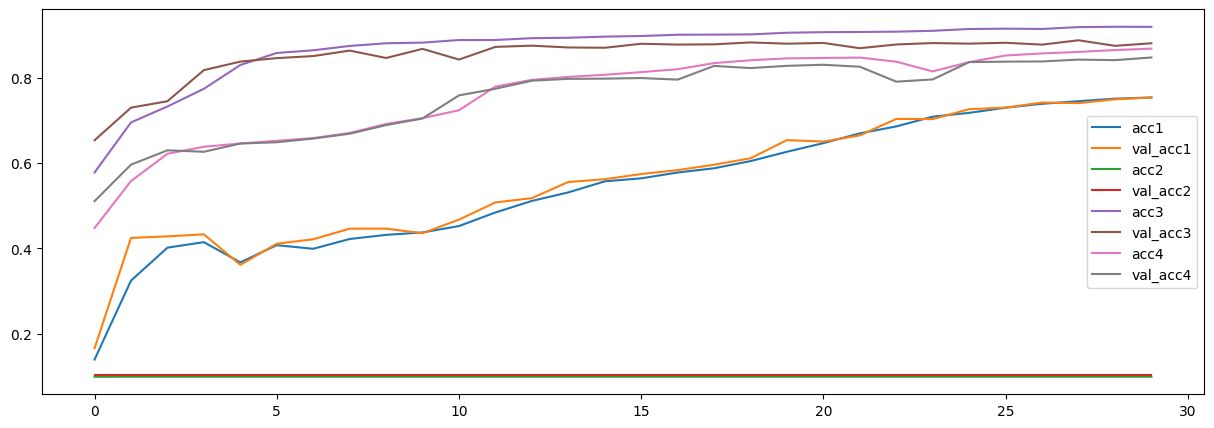

In [24]:
plt.figure(figsize=(15,5))

# sigmoid, SGD 사용한 모델
plt.plot(h1.history['acc'], label='acc1')
plt.plot(h1.history['val_acc'], label='val_acc1')

# relu, SGD 사용한 모델
plt.plot(h2.history['acc'], label='acc2')
plt.plot(h2.history['val_acc'], label='val_acc2')

# relu, Adam 사용한 모델
plt.plot(h3.history['acc'], label='acc3')
plt.plot(h3.history['val_acc'], label='val_acc3')

# relu, SGD 에서 lr=0.001로 사용한 모델
plt.plot(h4.history['acc'], label='acc4')
plt.plot(h4.history['val_acc'], label='val_acc4')

plt.legend()
plt.show()

## 최적화 모델 찾기
- 모델체크포인트(ModelCheckpoint) : 모델 저장
- 얼리스탐핑(EarlyStopping) : 조기학습 중단(과대적합, 시간낭비 방지)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [26]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태 설정
save_path = '/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수 (001, 002, 003, ...)
# f : 소수점 형태, .4 -> 소수점 4자리까지 형태의 자리수 (0.0001, 0.0002, 0.0003, ...)
# hdf5 : 저장되는 모델의 파일의 확장자

f_mckp = ModelCheckpoint(filepath = save_path,  # 파일 경로
                         monitor = 'val_acc',   # 해당 값을 기준으로 파일을 저장할지 결정
                         save_best_only = True, # monitor값이 가장 최고점 혹은 최저점을 갱신했을 경우 모델을 저장
                         mode = 'max',          # save_best_only가 True일 경우 갱신 값의 최대,최소를 결정(디폴드가 max)
                         verbose = 1            # 모델 개선 및 저장 메시지를 출력
                         )

In [27]:
# 2. 학습 조기 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        patience = 5 # monitor의 값 개선을 몇 번이나 기다려줄지를 결정
                        )

# -> 모델 학습 시 val_acc가 5번의 epoch를 돌 동안 개선되지 않으면 학습을 중단시켜주세요~!

In [32]:
model5 = Sequential()

model5.add(Flatten(input_shape=(28,28))) # 입력층
model5.add(Dense(500, activation='relu')) # 중간층들
model5.add(Dense(300, activation='relu'))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(30, activation='relu'))
model5.add(Dense(10, activation='softmax')) # 출력층

model5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

h5 = model5.fit(X_train, y_train_onehot, epochs=30,
              batch_size=128, validation_split=0.2,
              callbacks = [f_mckp, f_early])

Epoch 1/30
373/375 [============================>.] - ETA: 0s - loss: 1.9544 - acc: 0.6972
Epoch 1: val_acc improved from 0.47408 to 0.74892, saving model to /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/FashionModel_001_0.7489.hdf5
375/375 [==============================] - 4s 5ms/step - loss: 1.9491 - acc: 0.6976 - val_loss: 0.7544 - val_acc: 0.7489
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 0.6684 - acc: 0.7907
Epoch 2: val_acc improved from 0.74892 to 0.80642, saving model to /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/FashionModel_002_0.8064.hdf5
375/375 [==============================] - 2s 5ms/step - loss: 0.6684 - acc: 0.7907 - val_loss: 0.6547 - val_acc: 0.8064
Epoch 3/30
370/375 [============================>.] - ETA: 0s - loss: 0.5517 - acc: 0.8226
Epoch 3: val_acc improved from 0.80642 to 0.82875, saving model to /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/F

- 저장된 모델 로드하기

In [33]:
from tensorflow.keras.models import load_model

In [35]:
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/model/FashionModel_011_0.8817.hdf5')

In [36]:
best_model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3757 - acc: 0.8723


[0.37570905685424805, 0.8723000288009644]